# Split 7:3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load data from CSV file
df = pd.read_csv('ELC.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,4409.937988,2019-03-01
1,4347.826172,2019-03-04
2,4347.826172,2019-03-05
3,4347.826172,2019-03-06
4,4335.403809,2019-03-07
...,...,...
1316,27200.000000,2024-06-10
1317,28350.000000,2024-06-11
1318,28200.000000,2024-06-12
1319,28700.000000,2024-06-13


In [3]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [6]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[18706.29569932 18719.17556669 18732.05543405 18744.93530141
 18757.81516877 18770.69503614 18783.5749035  18796.45477086
 18809.33463823 18822.21450559 18835.09437295 18847.97424031
 18860.85410768 18873.73397504 18886.6138424  18899.49370976
 18912.37357713 18925.25344449 18938.13331185 18951.01317921
 18963.89304658 18976.77291394 18989.6527813  19002.53264866
 19015.41251603 19028.29238339 19041.17225075 19054.05211812
 19066.93198548 19079.81185284]


In [7]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 5177.587680854923
Testing MAE: 4524.135946057741
Testing MSLE: 0.16943183883080234
Testing MAPE: 42.12457733106016


Testing RMSE: 5177.587680854923
Testing MAE: 4524.135946057741
Testing MSLE: 0.16943183883080234
Testing MAPE: 42.12457733106016


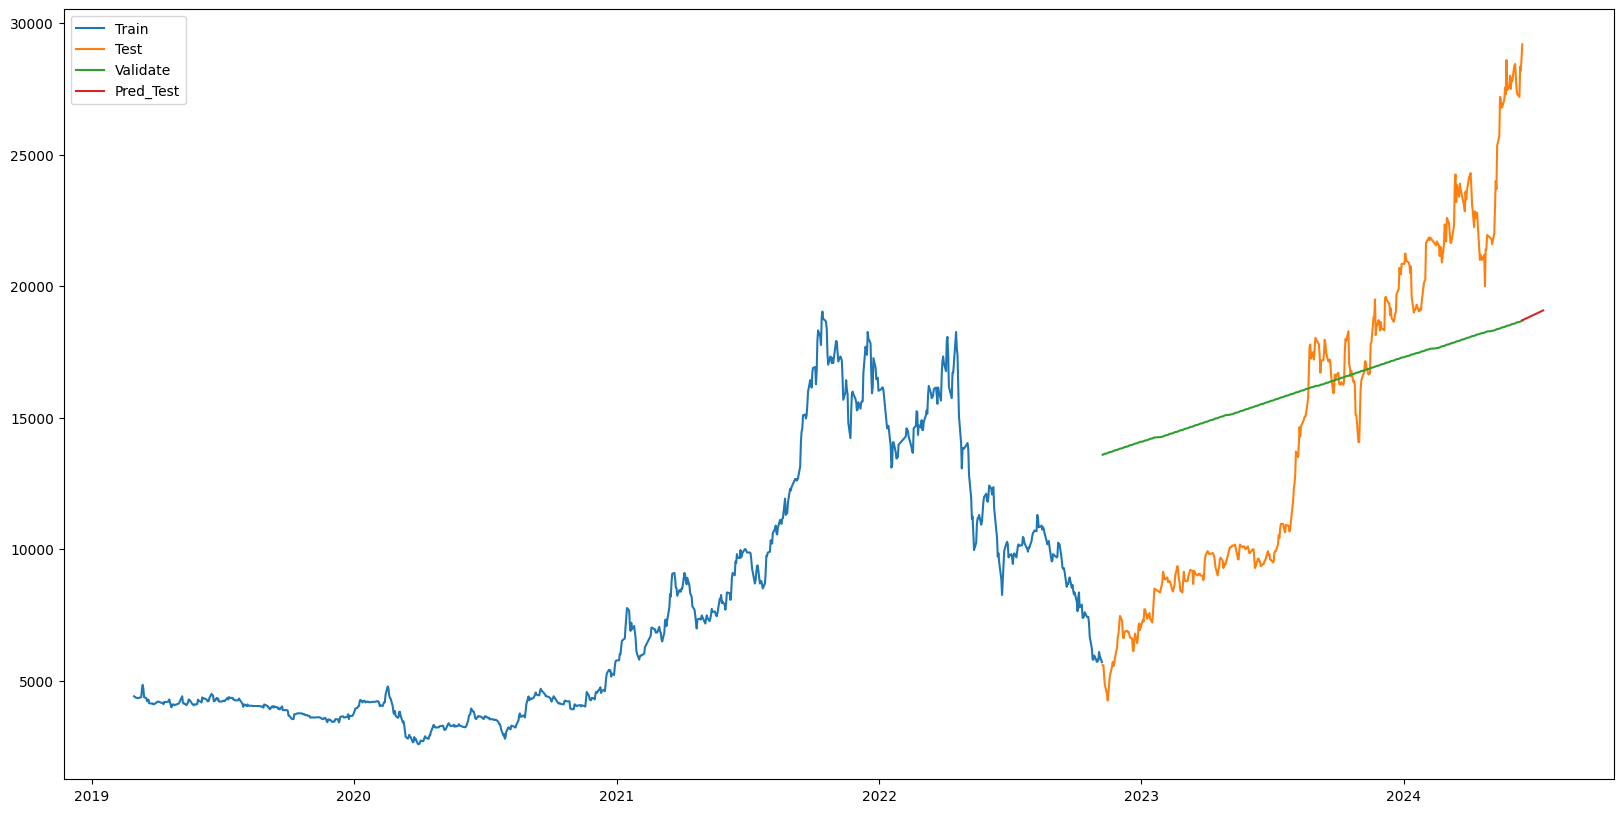

In [8]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=924, stop=1321, step=1)

# Split 8:2

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
# Load data from CSV file
df = pd.read_csv('ELC.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,4409.937988,2019-03-01
1,4347.826172,2019-03-04
2,4347.826172,2019-03-05
3,4347.826172,2019-03-06
4,4335.403809,2019-03-07
...,...,...
1316,27200.000000,2024-06-10
1317,28350.000000,2024-06-11
1318,28200.000000,2024-06-12
1319,28700.000000,2024-06-13


In [12]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [13]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [15]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[14890.70749853 14899.76077099 14908.81404345 14917.86731591
 14926.92058836 14935.97386082 14945.02713328 14954.08040574
 14963.1336782  14972.18695066 14981.24022312 14990.29349558
 14999.34676804 15008.4000405  15017.45331296 15026.50658542
 15035.55985788 15044.61313034 15053.6664028  15062.71967526
 15071.77294772 15080.82622018 15089.87949264 15098.9327651
 15107.98603756 15117.03931002 15126.09258248 15135.14585494
 15144.1991274  15153.25239986]


In [16]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 6502.582755256503
Testing MAE: 5598.926380605547
Testing MSLE: 0.131780284266395
Testing MAPE: 28.637557327677932


Testing RMSE: 6502.582755256503
Testing MAE: 5598.926380605547
Testing MSLE: 0.131780284266395
Testing MAPE: 28.637557327677932


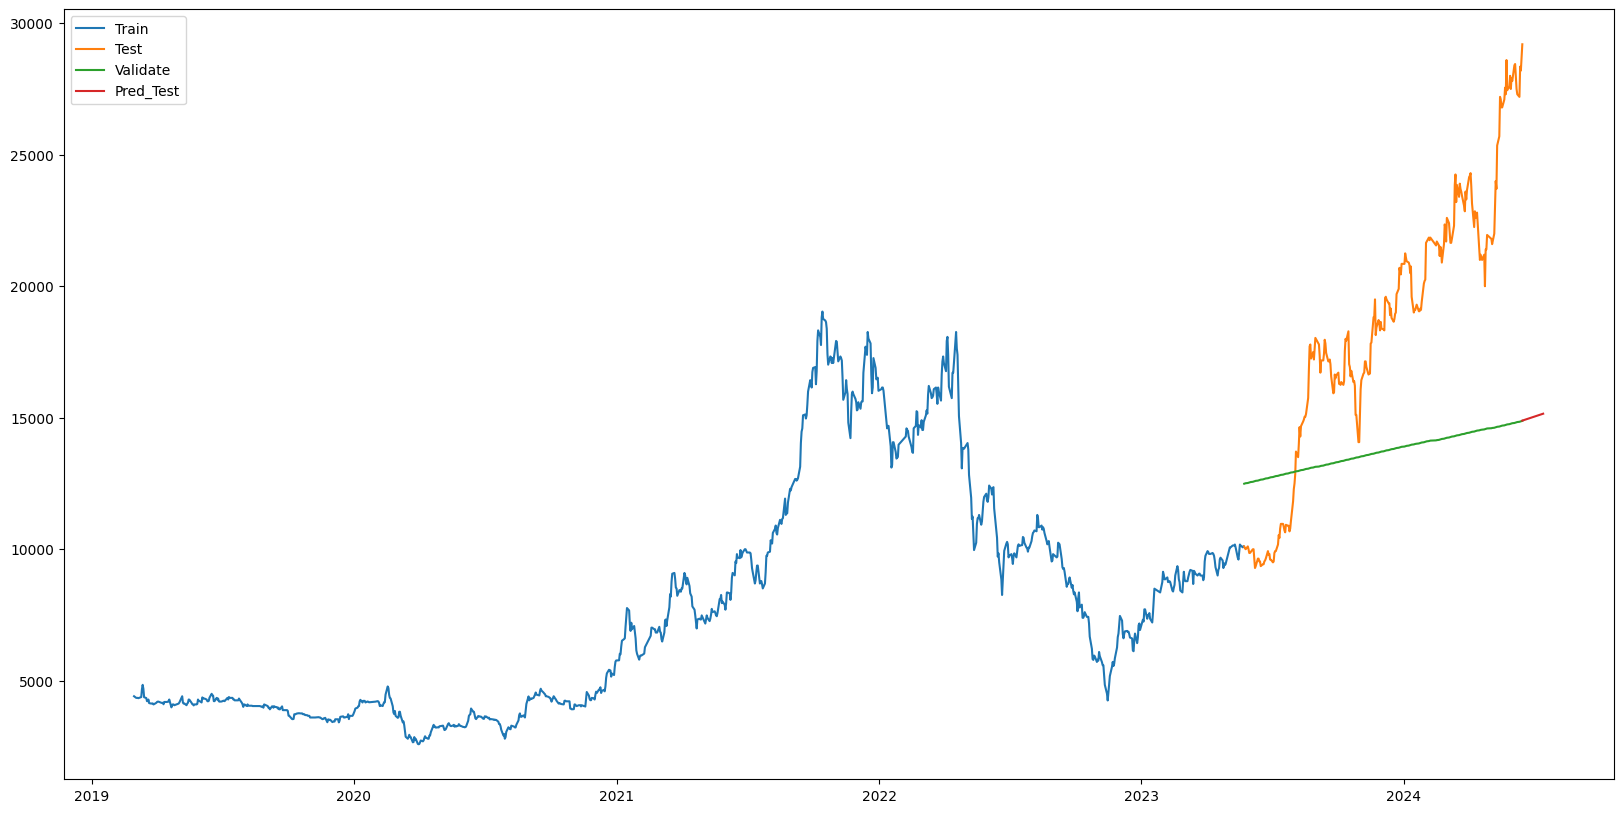

In [17]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [18]:
test_data.index

RangeIndex(start=1056, stop=1321, step=1)

# Split 9:1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
# Load data from CSV file
df = pd.read_csv('ELC.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,4409.937988,2019-03-01
1,4347.826172,2019-03-04
2,4347.826172,2019-03-05
3,4347.826172,2019-03-06
4,4335.403809,2019-03-07
...,...,...
1316,27200.000000,2024-06-10
1317,28350.000000,2024-06-11
1318,28200.000000,2024-06-12
1319,28700.000000,2024-06-13


In [21]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [22]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [23]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [24]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15443.17567582 15452.83217858 15462.48868134 15472.1451841
 15481.80168686 15491.45818962 15501.11469239 15510.77119515
 15520.42769791 15530.08420067 15539.74070343 15549.39720619
 15559.05370895 15568.71021171 15578.36671447 15588.02321723
 15597.67971999 15607.33622275 15616.99272551 15626.64922827
 15636.30573103 15645.96223379 15655.61873655 15665.27523931
 15674.93174207 15684.58824484 15694.2447476  15703.90125036
 15713.55775312 15723.21425588]


In [25]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 8119.7906581382895
Testing MAE: 7676.688621675689
Testing MSLE: 0.1793220431368799
Testing MAPE: 33.260099508566384


Testing RMSE: 8119.7906581382895
Testing MAE: 7676.688621675689
Testing MSLE: 0.1793220431368799
Testing MAPE: 33.260099508566384


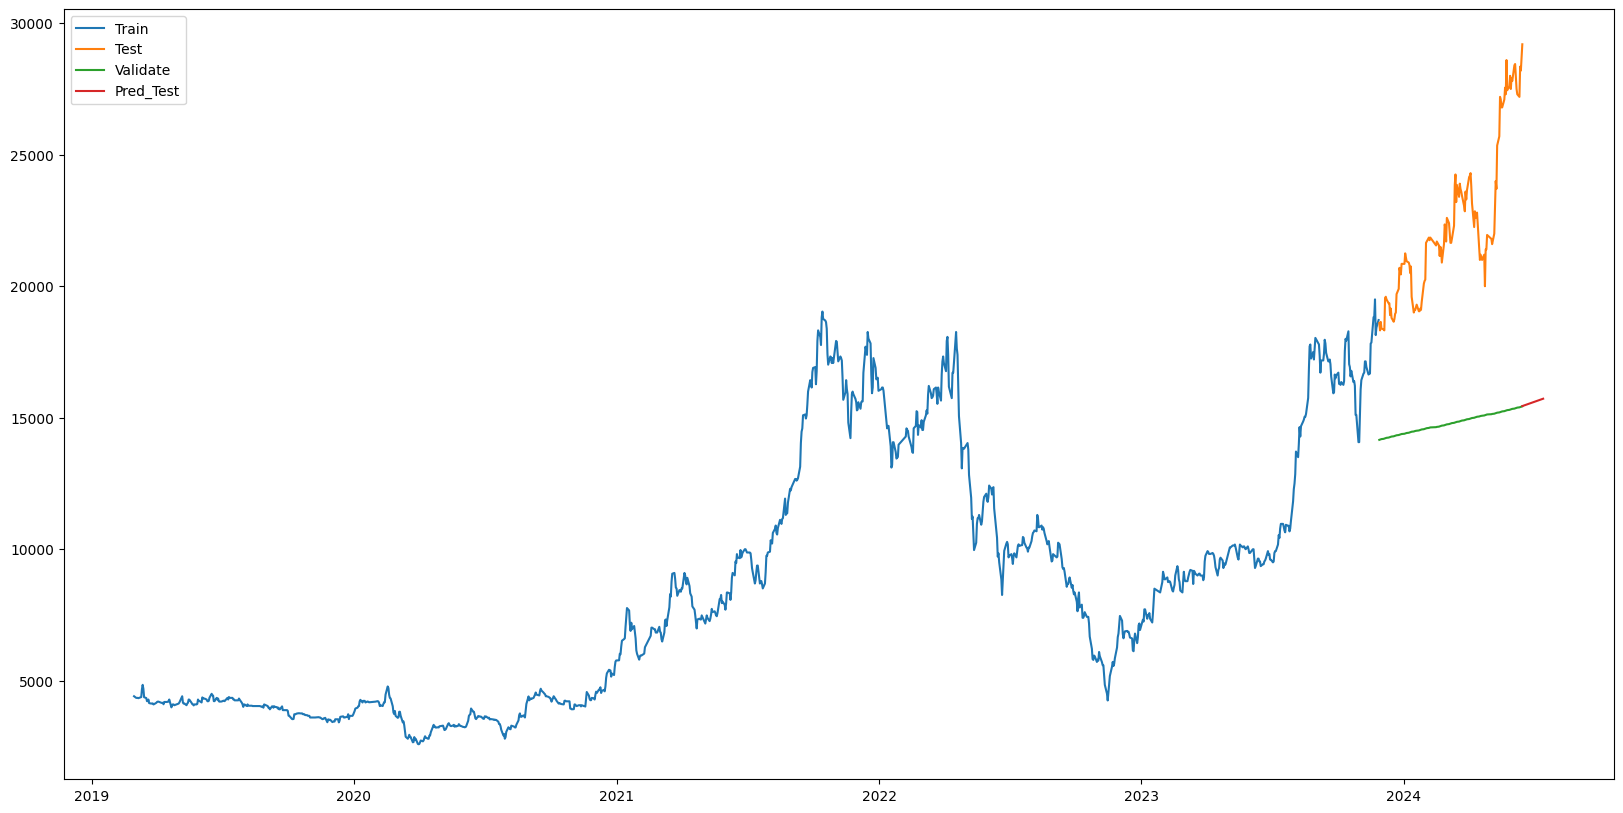

In [26]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [27]:
test_data.index

RangeIndex(start=1188, stop=1321, step=1)